In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#PATH_TO_DATA_TRAIN = "/kaggle/input/test-zoom-onebyone/kaggle_test_data_zoom/5"
#PATH_TO_DATA_TEST = "/kaggle/input/test-zoom-onebyone/kaggle_test_data_zoom/5"

#PATH_TO_DATA_TRAIN = "/kaggle/input/train-zoom-onebyone/kaggle_train_data_zoom/5"
#PATH_TO_DATA_TEST = "/kaggle/input/train-zoom-onebyone/kaggle_train_data_zoom/5"


PATH_TO_DATA_TRAIN = "/kaggle/input/train-val-test-zoom/train_set_53/7"
PATH_TO_DATA_TEST = "/kaggle/input/train-val-test-zoom/test_set_11_updated/7"
PATH_TO_DATA_VAL = "/kaggle/input/train-val-test-zoom/test_set_11/7"

#PATH_TO_DATA_VAL = "/kaggle/input/train-val-test-zoom/val_set_16/7"


#PATH_TO_DATA_TRAIN = "/kaggle/input/train-val-test-zoom/train_set_53/8"
#PATH_TO_DATA_TEST = "/kaggle/input/train-val-test-zoom/test_set_11/8"
#PATH_TO_DATA_VAL = "/kaggle/input/train-val-test-zoom/val_set_16/8"


#PATH_TO_DATA_TRAIN = "/kaggle/input/test-zoom-onebyone/kaggle_test_data_zoom/8"
#PATH_TO_DATA_TEST = "/kaggle/input/test-zoom-onebyone/kaggle_test_data_zoom/8"

#this one
#PATH_TO_DATA_TRAIN = "/kaggle/input/train-zoom-onebyone/kaggle_train_data_zoom/8"
#PATH_TO_DATA_TEST = "/kaggle/input/train-zoom-onebyone/kaggle_train_data_zoom/8"

#PATH_TO_DATA_TRAIN = "/kaggle/input/train-zoom-onebyone/kaggle_train_data_zoom/7"
#PATH_TO_DATA_TEST = "/kaggle/input/train-zoom-onebyone/kaggle_train_data_zoom/7"


#PATH_TO_DATA_TRAIN = "/kaggle/input/train-zoom-onebyone/kaggle_train_data_zoom/6"
#PATH_TO_DATA_TEST = "/kaggle/input/train-zoom-onebyone/kaggle_train_data_zoom/6"



#PATH_TO_DATA_TRAIN = "/kaggle/input/test-zoom-onebyone/kaggle_test_data_zoom/6"
#PATH_TO_DATA_TEST = "/kaggle/input/test-zoom-onebyone/kaggle_test_data_zoom/6"

#PATH_TO_DATA_TRAIN = "/kaggle/input/test-zoom-onebyone/kaggle_test_data_zoom/7"
#PATH_TO_DATA_TEST = "/kaggle/input/test-zoom-onebyone/kaggle_test_data_zoom/7"


#PATH_TO_DATA_TEST = "data/CRC-VAL-HE-7K"

In [3]:
"""
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 32 batch size = 47% on untrained 1 of 12 epoch model with no frozen
#batch_size_train =  32
#experimenting with a larger batch size, on frozen layer 
# on a full frozen and only dense 512-256, took 27% in 28/3771 iterations 1st epoch
#batch_size_train =  64

# large batch size 256 causes 10% warning, 16GB = 128
#batch_size_train =  256


# try 128 -> 77%
#batch_size_train =  128


# try 64 ->  may go upto 79%, after 4 epoch 77%
#batch_size_train =  64


# try 32 ->  may go upto 81%, after 3 epoch 79.3%
batch_size_train =  32

batch_size_test = 1

## alternate code to select certain number of images
import os 
images = [] 
labels =[] 
for sub_dir in os.listdir(PATH_TO_DATA_TRAIN): 
  image_list=os.listdir(os.path.join(PATH_TO_DATA_TRAIN,sub_dir)) #list of all image names in the directory 
  image_list = list(map(lambda x:os.path.join(sub_dir,x),image_list)) 
  #print("initial image list =%d", len(image_list))
  #print(len(image_list[0:19000]))
  #im_0 = image_list[0]
  #print(len(im_0))
  #im_1 = image_list[1]
  #print(len(im_1))
  #im_2 = image_list[2]
  #print(len(im_2))
  #im_3 = image_list[3]
  #print(len(im_3))
  #im_4 = image_list[4]
  #print(len(im_4))
  #im_5 = image_list[5]
  #print(len(im_5))
  images.extend(image_list[0:100])
  #print(len(images))

#forcing to take only 19K image from each
  labels.extend([sub_dir]*len(image_list[0:100]))
  #print(image_list)
  #print(len(image_list[0:100]))
  #print(temp)
  #exit
  #labels.extend([sub_dir]*len(image_list))

  print("number of images = %d", len(images))
  #print(images)

df = pd.DataFrame({"Images":images,"Labels":labels})      
df = df.sample(frac=1).reset_index(drop=True) # To shuffle the data 
df = df.head(500) # to take the subset of data (I'm taking 100 from it)
#df = df.head(76000) # to take the subset of data (I'm taking 100 from it)


train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=50,
    validation_split = 0.1
    )

#test_datagen = ImageDataGenerator(
#    rescale=1./255,
#    validation_split = 0.1
#    )

 
train_generator =train_datagen.flow_from_dataframe(
    dataframe=df,
    directory=PATH_TO_DATA_TRAIN,
    x_col="Images",
    y_col="Labels",
    color_mode='rgb', 
    batch_size=batch_size_train, 
    seed=42,
    shuffle=True,
    class_mode="categorical",
    subset="training", 
    target_size=(224,224))


validation_generator=train_datagen.flow_from_dataframe(
    dataframe=df,
    directory=PATH_TO_DATA_TRAIN,
    x_col="Images",
    y_col="Labels",
    color_mode='rgb', 
    batch_size=batch_size_test,
    seed=42,
    shuffle=False,
    class_mode="categorical",
    subset="validation",
    target_size = (224, 224))


#validation_generator=train_datagen.flow_from_dataframe(
#    dataframe=df,
##    directory=PATH_TO_DATA_TRAIN,
#    color_mode='rgb', 
#    batch_size=batch_size_test,
#    class_mode="categorical",
#    subset='training',
#    target_size = (224, 224))
"""


'\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator\n\n# 32 batch size = 47% on untrained 1 of 12 epoch model with no frozen\n#batch_size_train =  32\n#experimenting with a larger batch size, on frozen layer \n# on a full frozen and only dense 512-256, took 27% in 28/3771 iterations 1st epoch\n#batch_size_train =  64\n\n# large batch size 256 causes 10% warning, 16GB = 128\n#batch_size_train =  256\n\n\n# try 128 -> 77%\n#batch_size_train =  128\n\n\n# try 64 ->  may go upto 79%, after 4 epoch 77%\n#batch_size_train =  64\n\n\n# try 32 ->  may go upto 81%, after 3 epoch 79.3%\nbatch_size_train =  32\n\nbatch_size_test = 1\n\n## alternate code to select certain number of images\nimport os \nimages = [] \nlabels =[] \nfor sub_dir in os.listdir(PATH_TO_DATA_TRAIN): \n  image_list=os.listdir(os.path.join(PATH_TO_DATA_TRAIN,sub_dir)) #list of all image names in the directory \n  image_list = list(map(lambda x:os.path.join(sub_dir,x),image_list)) \n  #print("initial image 

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# try 32 ->  may go upto 81%, after 3 epoch 79.3%
batch_size_train =  32

batch_size_test = 1


train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=50,
    #validation_split = 0.2
    #validation_split = 0.1

    )



val_datagen = ImageDataGenerator(
    rescale=1./255
    #horizontal_flip=True,
    #vertical_flip=True,
    #rotation_range=50,
    #validation_split = 0.2
    #validation_split = 0.1

    )


train_generator =train_datagen.flow_from_directory(
    #dataframe=df,
    directory=PATH_TO_DATA_TRAIN,
    color_mode='rgb', 
    batch_size=batch_size_train, 
    seed=42,
    shuffle=True,
    class_mode="categorical",
    #subset="training", 
    target_size=(224,224))

validation_generator=val_datagen.flow_from_directory(
    #dataframe=df,
    directory=PATH_TO_DATA_VAL,
    color_mode='rgb', 
    batch_size=batch_size_test,
    seed=42,
    shuffle=False,
    class_mode="categorical",
    #subset="validation",
    target_size = (224, 224))

test_generator=val_datagen.flow_from_directory(
    #dataframe=df,
    directory=PATH_TO_DATA_TEST,
    color_mode='rgb', 
    batch_size=batch_size_test,
    seed=42,
    shuffle=False,
    class_mode="categorical",
    #subset="validation",
    target_size = (224, 224))




2021-10-16 16:47:13.938744: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


Found 175838 images belonging to 5 classes.
Found 38596 images belonging to 5 classes.
Found 37585 images belonging to 5 classes.


In [5]:
#analyze how many in each class 
classes = ['CC', 'EC', 'LC', 'MC', 'SC'],
#y_true = validation_generator.classes

myv = validation_generator.classes;

bin_arr = np.bincount(myv)
print("validation", bin_arr)

myv1 = train_generator.classes;

bin_arr1 = np.bincount(myv1)
print("training", bin_arr1)

myv2 = test_generator.classes;

bin_arr2 = np.bincount(myv2)
print("test", bin_arr2)



#image_batch, label_batch = next(validation_generator)
#print(label_batch[2])
#y_CC = validation_generator.count('CC')

validation [ 8123  8248  3369  7547 11309]
training [45865 21481 14575 17242 76675]
test [ 7938 11324  3369  5870  9084]


In [6]:
#print(validation_generator.filenames)

#this is to check if the train set has any images from test set patient

#get a list of all the images in the train set
filenames=train_generator.filenames
results=pd.DataFrame({"Filename":filenames})
results.to_csv("ww42.3_results_train_8.csv",index=False)


#get a list of all the images in the validation set
filenames=validation_generator.filenames
results=pd.DataFrame({"Filename":filenames})
results.to_csv("ww42.3_results_val_8.csv",index=False)



In [7]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
               'balanced',
                np.unique(train_generator.classes), 
                train_generator.classes)
class_weights = {l:c for l,c in zip(np.unique(train_generator.classes), class_weights)}

print(class_weights)

#class_weights = sklearn.utils.class_weight.compute_class_weight('balanced', np.unique(labels[i]), labels[i])
#class_weights = {l:c for l,c in zip(np.unique(labels[i]), class_weights)}


{0: 0.7667633271557833, 1: 1.6371491085145011, 2: 2.4128713550600343, 3: 2.039647372694583, 4: 0.4586579719595696}


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1 2 3 4], y=[0 0 0 ... 4 4 4] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [8]:
import matplotlib.pyplot as plt
import numpy as np

def data_visualisation(train_generator
                      ) -> None:
    """
    Plot 25 images from one batch
    
    train_generator: DirectoryIterator, a train generator that can be obtained from 
                     flow_from_directory in tensorflow.
    """
    image_batch, label_batch = next(train_generator)
    classes = np.asarray(list(train_generator.class_indices))
    #debug 
    #print(classes)
    
    plt.figure(figsize=(10,10))
    for n in range(25):
        plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(classes[label_batch[n]==1])
        plt.axis('off')
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()


def data_augment_visualisation(train_generator
                              ) -> None:
    """
    Plot 5 augmented version of the same image
    
    train_generator: DirectoryIterator, a train generator that can be obtained from 
                     flow_from_directory in tensorflow.
    """
    augmented_images = [train_generator[0][0][0] for i in range(5)]
    fig, axes = plt.subplots(1, 5, figsize=(10, 10))
    axes = axes.flatten()
    for img, ax in zip(augmented_images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

In [9]:
#image_batch, label_batch = next(validation_generator)
#image_batch, label_batch = next(train_generator)





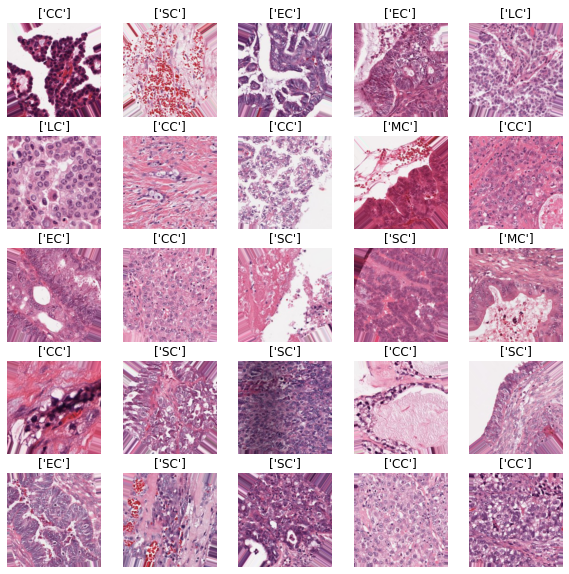

In [10]:
data_visualisation(train_generator)

In [11]:
#data_visualisation(validation_generator)

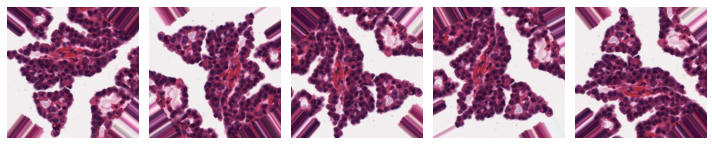

In [12]:
data_augment_visualisation(train_generator)

In [13]:
from tensorflow.keras.applications.vgg16 import VGG16
source_model = VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))

#from tensorflow.keras.applications.vgg19 import VGG19
#source_model = VGG19(include_top=False, weights='imagenet', input_shape=(224,224,3))


2021-10-16 16:52:53.817535: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-16 16:52:53.820921: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-16 16:52:53.864888: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-16 16:52:53.865567: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-16 16:52:53.865633: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-16 16:52:53.892668: I tensorflow/stream_executor/platform/def

58892288/58889256 [==============================] - 0s 0us/step


In [14]:
source_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model

x = source_model.output

x = Flatten(name='flatten')(x)
#x = Dense(4096,activation='relu',
#x = Dense(1024,activation='relu',
#          kernel_regularizer=l2(1e-4),
#          name='fc6')(x)
#x = Dropout(0.5, name='drop6')(x)
#x = Dense(4096,activation='relu',
x = Dense(1024,activation='relu',
          kernel_regularizer=l2(1e-4),
          name='fc7')(x)
#x = Dropout(0.5, name='drop7')(x)

preds = Dense(5, activation='softmax', name='prob')(x)
# Final model: 
target_model = Model(inputs=source_model.input, outputs=preds)

In [16]:
# print final model
target_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
from tensorflow.keras.optimizers import SGD

opti = SGD(lr=1e-4, momentum=0.9)

target_model.compile(optimizer=opti,
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])

epochs = 8 

In [18]:
print('step size:', train_generator.n//train_generator.batch_size)

step size: 5494


In [19]:
# in first epoch around 80% image, stop and run again, immediately 
# reach a high number upto =80% and build to 90% in next epoch
epochs = 1
import time

start_time = time.time()


history = target_model.fit(x=train_generator,
                           steps_per_epoch=train_generator.samples // train_generator.batch_size, 
                           epochs=epochs, 
                           class_weight=class_weights)

time_elapsed = time.time() - start_time
print("Training complete in {:.0f}m {:.0f}s".format(time_elapsed // 60, time_elapsed % 60))

2021-10-16 16:52:57.757228: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-16 16:52:57.761238: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000170000 Hz
2021-10-16 16:52:58.682248: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-16 16:52:59.587519: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-10-16 16:52:59.630816: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


5494/5494 [==============================] - 2975s 540ms/step - loss: 0.8695 - accuracy: 0.7025
Training complete in 49m 36s


In [20]:
epochs = 4
#epochs = 8
# Image 7 
#epochs = 6 

# in first epoch around 80% image, stop and run again, immediately 
# reach a high number upto =80% and build to 90% in next epoch
import time

start_time = time.time()


history = target_model.fit(x=train_generator,
                           steps_per_epoch=train_generator.samples // train_generator.batch_size, 
                           epochs=epochs, 
                           class_weight=class_weights)

time_elapsed = time.time() - start_time
print("Training complete in {:.0f}m {:.0f}s".format(time_elapsed // 60, time_elapsed % 60))

Epoch 1/4
5494/5494 [==============================] - 2661s 484ms/step - loss: 0.4143 - accuracy: 0.9010
Epoch 2/4
5494/5494 [==============================] - 2688s 489ms/step - loss: 0.3550 - accuracy: 0.9281
Epoch 3/4
5494/5494 [==============================] - 2768s 504ms/step - loss: 0.3249 - accuracy: 0.9412
Epoch 4/4
5494/5494 [==============================] - 2773s 505ms/step - loss: 0.3045 - accuracy: 0.9511
Training complete in 181m 32s


In [21]:
import matplotlib.pyplot as plt

def history_plot(history
                ) -> None:
    """
    Plot the history of the accuracies and losses at each epoch
    
    history: history of the training (this is the output of the function 'fit')
    """
    epochs_range = range(len(history.history['loss']))
    fig = plt.figure(figsize=(8, 8))
    
    # plot of accuracy
    ax = fig.add_subplot(1, 2, 1)
    acc = history.history['accuracy']
    ax.plot(epochs_range, acc)
    
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    
    # plot of loss
    ax = fig.add_subplot(1, 2, 2)
    loss = history.history['loss']
    ax.plot(epochs_range, loss)
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

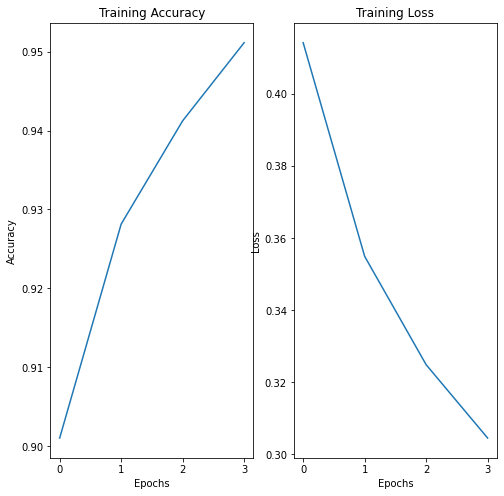

In [22]:
history_plot(history)

In [23]:
target_model.save('/kaggle/working/target_model_v1.ww42.3_vgg16_32b_72-train_val_test-7_1')

2021-10-16 20:44:53.275859: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [24]:
#import tensorflow as tf
#!ls /kaggle/input/kaggle-data-zoom-transfer-learning-clean
#path_model_saved = '/kaggle/input/kaggle-data-zoom-transfer-learning-clean/target_model_v1.ww42.3_vgg16_32b_72-train_val_test-8'

#target_model = tf.keras.models.load_model(path_model_saved)


In [25]:
#eva = target_model.evaluate(x = validation_generator,
#                            steps = validation_generator.samples )

eva = target_model.evaluate(x = validation_generator,
                            steps = validation_generator.samples // validation_generator.batch_size)


38596/38596 [==============================] - 330s 9ms/step - loss: 1.5489 - accuracy: 0.6512


In [26]:
#eva = target_model.evaluate(x = validation_generator,
#                            steps = validation_generator.samples )

eva = target_model.evaluate(x = test_generator,
                            steps = test_generator.samples // validation_generator.batch_size)


37585/37585 [==============================] - 315s 8ms/step - loss: 1.0111 - accuracy: 0.7456


In [27]:
#print(eva)

In [28]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
from typing import List
import numpy as np
import pandas.testing as tm

def plot_confusion_mat(y_true: np.ndarray, 
                       y_pred: np.ndarray, 
                       classes: List[str] = ['CC', 'EC', 'LC', 'MC', 'SC'], 
                       title: str = "normal"
                      ) -> None:
    """
    Plot the confusion matrix using confusion_matrix function from scikit-learn
    
    y_true: true labels, number between 0 to (number of classes-1)
    y_pred: predicted labels, number between 0 to (number of classes-1)
    classes: list of the name of all the classes
    title: name of the experiment
    """
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm,
                         index=[i for i in classes],
                         columns=[i for i in classes])
    plt.figure(figsize=(10, 7))
    sn.heatmap(df_cm, annot=True, vmin=0, vmax=400, fmt=".0f", annot_kws={'size': 13}, square=True)
    plt.title("Confusion matrix: "+title)
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

In [29]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score
from typing import List
import numpy as np

def plot_AUC_ROC(y_true: np.ndarray, 
                 predictions: np.ndarray, 
                 classes: List[str] = ['CC', 'EC', 'LC', 'MC', 'SC'], 
                 title: str = "normal"
                ) -> None:
    """
    Plot the AUC-ROC Curve for multiple-classes
    
    y_true: true labels, number between 0 to (number of classes-1)
    predictions: prediction probability for all classes
    classes: list of the name of all the classes
    title: name of the experiment
    """
    num_classes = len(classes)
    
    #debug 
    #print(num_classes)
    y_true = label_binarize(y_true, classes=list(range(num_classes)))
    for c in range(len(classes)):
        
        #debug 
        #print(c)
        auc_roc = roc_auc_score(y_true[:, c], predictions[:, c])
        #label = classes[c] + " AUC: %.3f " % auc_roc
        label =  classes[c] +  " AUC: %.3f" % auc_roc
        
        #debug
        #print(label)

        a, b, _ = roc_curve(y_true[:, c], predictions[:, c])
        plt.figure(1, figsize=(7, 7))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(a, b, label=label)
        plt.xlabel("False positive rate")
        plt.ylabel("True positive rate")
        plt.legend(loc="lower right")
    plt.title("AUC-ROC Curve: "+title)
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

In [30]:
"""classes = ['CC', 'EC', 'LC', 'MC', 'SC'],
validation_generator.reset()
y_true = validation_generator.classes
"""

"classes = ['CC', 'EC', 'LC', 'MC', 'SC'],\nvalidation_generator.reset()\ny_true = validation_generator.classes\n"

In [31]:

#results per (test) train data
classes = ['CC', 'EC', 'LC', 'MC', 'SC'],
test_generator.reset()
y_true = test_generator.classes

test_generator.reset()
predictions = target_model.predict(x = test_generator, 
                                   steps = test_generator.samples // validation_generator.batch_size)
#print(predictions)
y_pred = np.argmax(predictions, axis=1)

#should comment this
local_labels = (test_generator.class_indices)
local_labels = dict((v,k) for k,v in local_labels.items())
loc_predictions = [local_labels[k] for k in y_pred]

#should comment this
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":loc_predictions})
results.to_csv("ww42.3_results_test_7_1.csv",index=False)


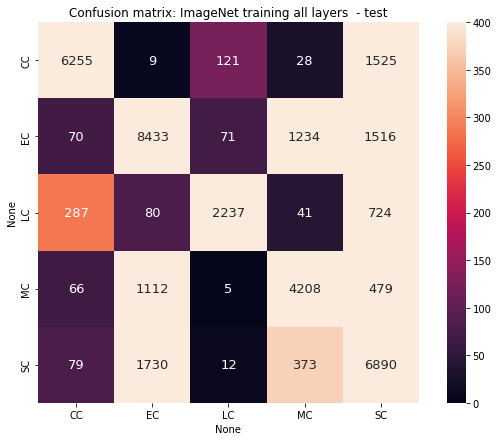

(['CC', 'EC', 'LC', 'MC', 'SC'],)


In [32]:
import matplotlib.pyplot as plt
import numpy as np

plot_confusion_mat(y_true, y_pred, classes, "ImageNet training all layers  - test")
print(classes)

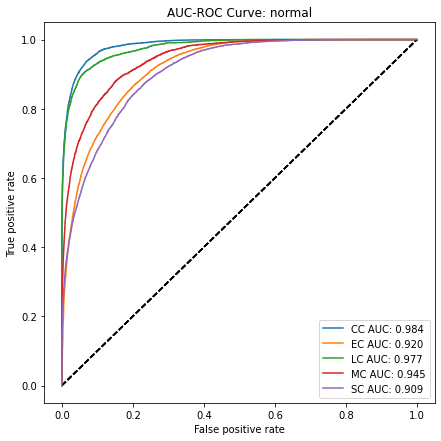

In [33]:
classes = ['CC', 'EC', 'LC', 'MC', 'SC']
plot_AUC_ROC(y_true, predictions, classes, "normal")

In [34]:
#results per (test) train data
classes = ['CC', 'EC', 'LC', 'MC', 'SC'],
validation_generator.reset()
y_true = validation_generator.classes

validation_generator.reset()
predictions = target_model.predict(x = validation_generator, 
                                   steps = validation_generator.samples // validation_generator.batch_size)
#print(predictions)
y_pred = np.argmax(predictions, axis=1)

#should comment this
local_labels = (validation_generator.class_indices)
local_labels = dict((v,k) for k,v in local_labels.items())
loc_predictions = [local_labels[k] for k in y_pred]

#should comment this
filenames=validation_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":loc_predictions})
results.to_csv("ww42.3results_train_val_test_7_1.csv",index=False)


In [35]:
#print(y_true)

In [36]:
#test
#classes = ['CC', 'MC', 'SC', 'LC', 'EC']
#auc = 0.923632
#label = classes[0][4] + " AUC %.3f" % auc
#print(label)

In [37]:
"""validation_generator.reset()
predictions = target_model.predict(x = validation_generator, 
                                   steps = validation_generator.samples // validation_generator.batch_size)
#print(predictions)
y_pred = np.argmax(predictions, axis=1)
"""

'validation_generator.reset()\npredictions = target_model.predict(x = validation_generator, \n                                   steps = validation_generator.samples // validation_generator.batch_size)\n#print(predictions)\ny_pred = np.argmax(predictions, axis=1)\n'

In [38]:
#should comment this
#local_labels = (validation_generator.class_indices)
#local_labels = dict((v,k) for k,v in local_labels.items())
#predictions_local = [local_labels[k] for k in y_pred]


In [39]:
#should comment this
#filenames=validation_generator.filenames
#results=pd.DataFrame({"Filename":filenames,
#                      "Predictions":predictions_local})
#results.to_csv("results.csv",index=False)

In [40]:
#print(y_pred)

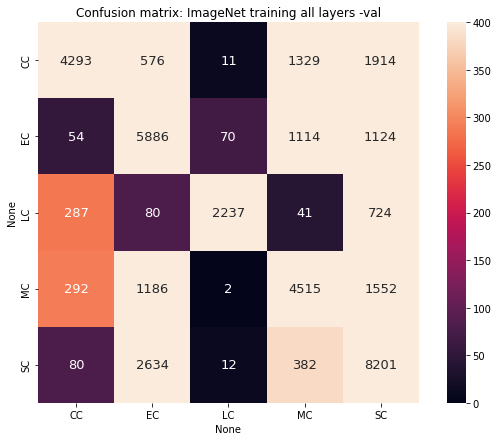

(['CC', 'EC', 'LC', 'MC', 'SC'],)


In [41]:
import matplotlib.pyplot as plt
import numpy as np

plot_confusion_mat(y_true, y_pred, classes, "ImageNet training all layers -val")
print(classes)

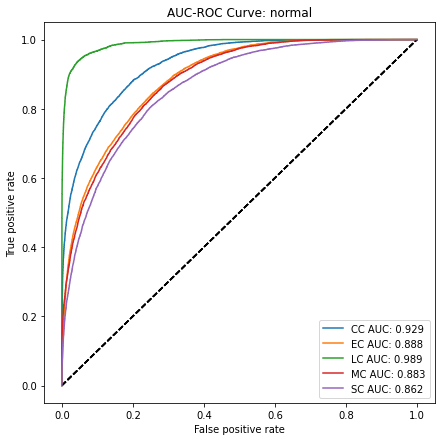

In [42]:
classes = ['CC', 'EC', 'LC', 'MC', 'SC']
plot_AUC_ROC(y_true, predictions, classes, "normal")